In [ ]:
from dotenv import load_env

load_env()

In [1]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def add_one(input: list[HumanMessage]):
    input[0].content = input[0].content + "a"
    return input

graph = MessageGraph()

graph.add_node("branch_a", add_one) # branch a starting, #start state
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_a", "branch_c")

graph.add_node("branch_b", add_one) # A to B
graph.add_node("branch_c", add_one) # A to C

graph.add_edge("branch_b", "final_node") # B to END
graph.add_edge("branch_c", "final_node") # C to END

graph.add_node("final_node", add_one) 
graph.add_edge("final_node", END) # end state

graph.set_entry_point("branch_a")
# no need to call finish point

runnable = graph.compile()


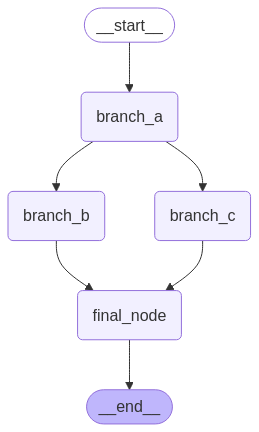

In [3]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png())) # wtf is this draw mermaid lmfao

In [4]:
runnable.invoke("a")

[HumanMessage(content='aaaaa', additional_kwargs={}, response_metadata={}, id='0fc4babd-c0ad-4a8f-92c4-cbfb6833176c')]

In [ ]:
# conditional edges
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def entry(input: list[HumanMessage]):
    return input

def work_with_b(input: list[HumanMessage]):
    print("Using Branch B")
    return input

def work_with_c(input: list[HumanMessage]):
    print("Using Branch C")
    return input

def router(input: list[HumanMessage]):
    if "use_b" in input[0].content: #if invoke string does not contain use_b, it will go to branch_c
        return "branch_b"
    else:
        return "branch_c"
    
graph = MessageGraph()

graph.add_node("branch_a", entry) # branch a starting, #start state
graph.add_node("branch_b", work_with_b) 
graph.add_node("branch_c", work_with_c)

graph.add_conditional_edges(
    "branch_a",
    router,
    {
        "branch_b": "branch_b",
        "branch_c": "branch_c"
    }
)

graph.add_edge("branch_b", END) 
graph.add_edge("branch_c", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()

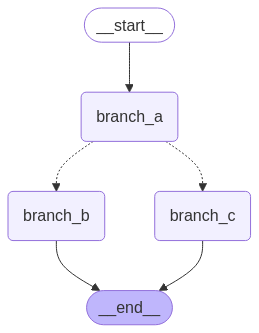

In [7]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png())) # wtf is this draw mermaid lmfao

In [8]:
runnable.invoke("bruh")

Using Branch C


[HumanMessage(content='bruh', additional_kwargs={}, response_metadata={}, id='42986bda-3702-451a-880d-4578bf8f78ee')]

In [9]:
runnable.invoke("lemme use_b")

Using Branch B


[HumanMessage(content='lemme use_b', additional_kwargs={}, response_metadata={}, id='8e8b4d16-327b-49d3-a0b0-23c2f1bf60c6')]